In [1]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# 2️⃣ Load cleaned dataset
file_path = 'D:/mental_health_project/data/processed/Combined_Data_Cleaned.csv'
df = pd.read_csv(file_path)

In [3]:
# Quick check
print("Columns in dataset:", df.columns)
print("First 5 rows:\n", df.head())

Columns in dataset: Index(['post_id', 'statement', 'status', 'cleaned_statement'], dtype='object')
First 5 rows:
    post_id                                          statement   status  \
0        0                                         oh my gosh  Anxiety   
1        1  trouble sleeping, confused mind, restless hear...  Anxiety   
2        2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3        3  I've shifted my focus to something else but I'...  Anxiety   
4        4  I'm restless and restless, it's been a month n...  Anxiety   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  


In [4]:
# 3️⃣ Select the text column
text_col = 'cleaned_statement'

In [5]:
# 4️⃣ Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000,   # You can adjust number of features
                        ngram_range=(1,2),   # Use unigrams and bigrams
                        stop_words='english')

In [7]:
print(df[text_col].isnull().sum())


79


In [8]:
df[text_col] = df[text_col].fillna('')


In [9]:
# 5️⃣ Fit and transform the cleaned text
X_features = tfidf.fit_transform(df[text_col])

In [10]:
# 6️⃣ Convert TF-IDF matrix to DataFrame for inspection
tfidf_df = pd.DataFrame(X_features.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF feature matrix shape:", tfidf_df.shape)
print(tfidf_df.head())

TF-IDF feature matrix shape: (51073, 5000)
   abandon  abandoned  abandonment  abdomen  abdominal  abilify  ability  \
0      0.0        0.0          0.0      0.0        0.0      0.0      0.0   
1      0.0        0.0          0.0      0.0        0.0      0.0      0.0   
2      0.0        0.0          0.0      0.0        0.0      0.0      0.0   
3      0.0        0.0          0.0      0.0        0.0      0.0      0.0   
4      0.0        0.0          0.0      0.0        0.0      0.0      0.0   

   able  able afford  able help  ...  youtube  youve   yr  yr old  zero  \
0   0.0          0.0        0.0  ...      0.0    0.0  0.0     0.0   0.0   
1   0.0          0.0        0.0  ...      0.0    0.0  0.0     0.0   0.0   
2   0.0          0.0        0.0  ...      0.0    0.0  0.0     0.0   0.0   
3   0.0          0.0        0.0  ...      0.0    0.0  0.0     0.0   0.0   
4   0.0          0.0        0.0  ...      0.0    0.0  0.0     0.0   0.0   

   zoloft  zombie  zone   ðÿ  ðÿ ðÿ  
0     0.0  

In [11]:
# 7️⃣ Optional: Save TF-IDF features for later use
tfidf_df.to_csv('D:/mental_health_project/data/processed/TFIDF_Features.csv', index=False)
print("TF-IDF features saved to: D:/mental_health_project/data/processed/TFIDF_Features.csv")

TF-IDF features saved to: D:/mental_health_project/data/processed/TFIDF_Features.csv


In [13]:
import wordcloud
print(wordcloud.__version__)


1.9.4


In [15]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text

df['cleaned_text'] = df['statement'].fillna('').apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
text = " ".join(df['cleaned_text'])


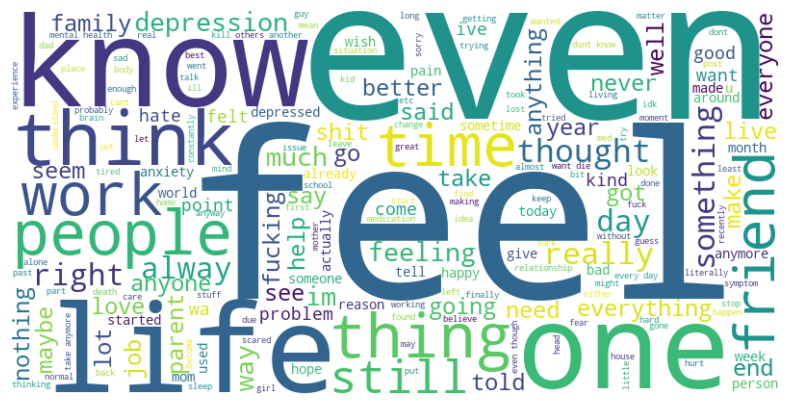

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


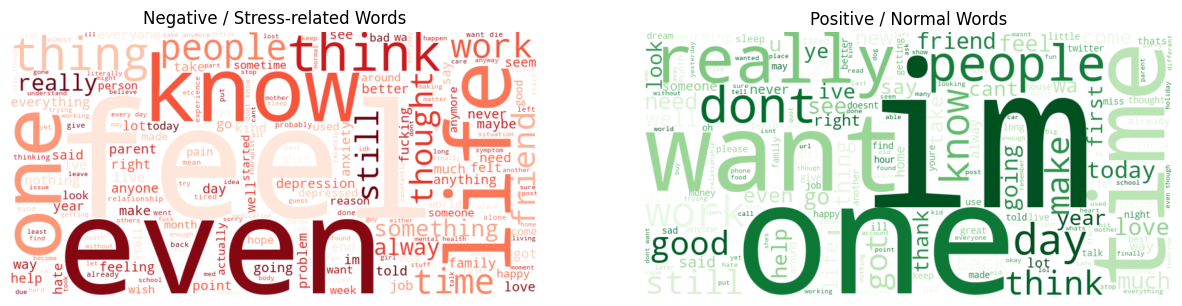

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define classes
neg_classes = ['Anxiety', 'Bipolar', 'Depression', 'Stress', 'Suicidal', 'Personality disorder']
pos_classes = ['Normal']

# Combine text for each group
neg_text = " ".join(df[df['status'].isin(neg_classes)]['cleaned_text'].fillna(''))
pos_text = " ".join(df[df['status'].isin(pos_classes)]['cleaned_text'].fillna(''))

# Generate Word Clouds
neg_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)
pos_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)

# Plot both word clouds
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative / Stress-related Words")

plt.subplot(1,2,2)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive / Normal Words")

plt.show()
